<a href="https://colab.research.google.com/github/eduardoymd/Checkpoint-01-An-lise-de-Dados-de-Consumidores-de-Energia/blob/main/Checkpoint_01_An%C3%A1lise_de_Dados_de_Consumidores_de_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption**

In [32]:
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/content/cp1/household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

In [35]:
#Questão 1
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [36]:
#Questão 3
missing_values = df.isnull().sum()
print(missing_values)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [37]:
#Questão 4
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
dias = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['Dia_Semana'] = df['Datetime'].dt.day_name().map(dias)
df[['Datetime', 'Dia_Semana']].head()


/tmp/ipython-input-1513483883.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


,Datetime,Dia_Semana
0,2006-12-16 17:24:00,Sábado
1,2006-12-16 17:25:00,Sábado
2,2006-12-16 17:26:00,Sábado
3,2006-12-16 17:27:00,Sábado
4,2006-12-16 17:28:00,Sábado


In [38]:
#Questão 5
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_2007 = df[df['Date'].dt.year == 2007]

media_diaria = df_2007.groupby('Date')['Global_active_power'].mean()
print(media_diaria.head())

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


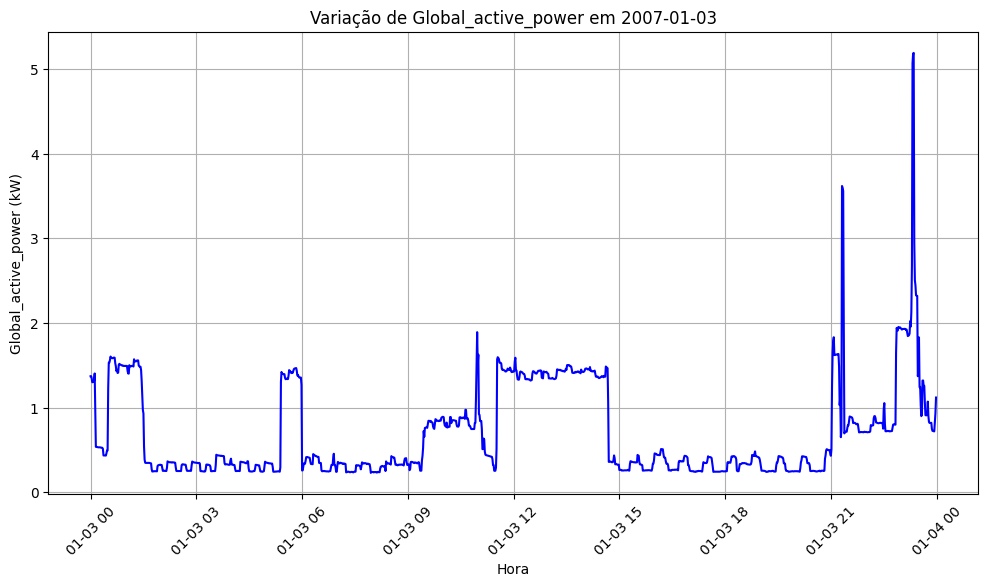

In [39]:
#Questão 6
import matplotlib.pyplot as plt

dia_escolhido = '2007-01-03'

df_dia = df[df['Date'] == dia_escolhido].copy()

df_dia['Datetime'] = pd.to_datetime(df_dia['Date'].astype(str) + ' ' + df_dia['Time'])

plt.figure(figsize=(12,6))
plt.plot(df_dia['Datetime'], df_dia['Global_active_power'], color='blue')
plt.title(f'Variação de Global_active_power em {dia_escolhido}')
plt.xlabel('Hora')
plt.ylabel('Global_active_power (kW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


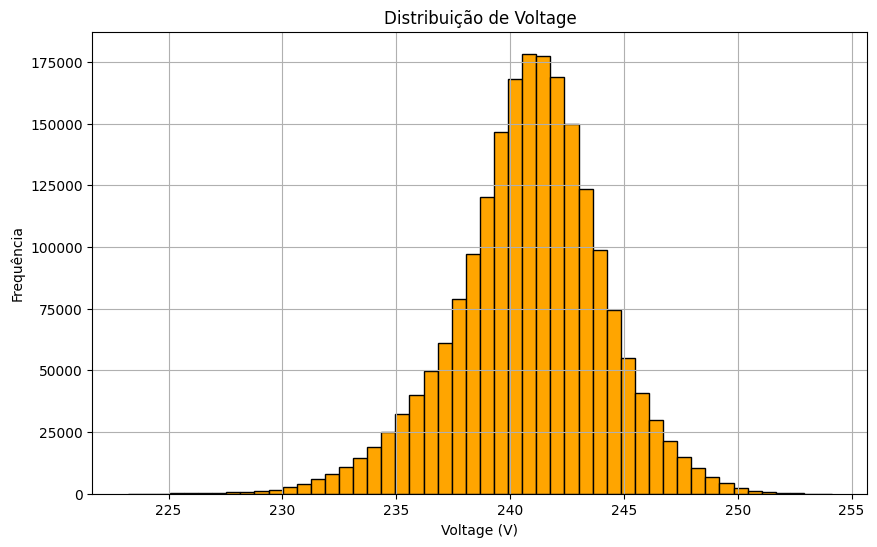

In [40]:
#Questão 7
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Voltage'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribuição de Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [41]:
#Questão 8
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Ano_Mes'] = df['Date'].dt.to_period('M')  # formato YYYY-MM
media_mensal = df.groupby('Ano_Mes')['Global_active_power'].mean()
print(media_mensal)

Ano_Mes
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010-11    1.196854
Freq: M, Name: Global_active_pow

In [42]:
#Questão 9
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
consumo_diario = df.groupby('Date')['Global_active_power'].sum()
dia_maior_consumo = consumo_diario.idxmax()
maior_consumo = consumo_diario.max()
print(f"O dia com maior consumo foi {dia_maior_consumo.date()} com {maior_consumo:.2f} kW-min")

O dia com maior consumo foi 2006-12-23 com 4773.39 kW-min


In [43]:
#Questão 10
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Dia_Semana'] = df['Date'].dt.day_name()
df['Tipo_Dia'] = df['Dia_Semana'].apply(lambda x: 'Final de Semana' if x in ['Saturday','Sunday'] else 'Dia de Semana')
media_por_tipo = df.groupby('Tipo_Dia')['Global_active_power'].mean()
print(media_por_tipo)

Tipo_Dia
Dia de Semana      1.035472
Final de Semana    1.234232
Name: Global_active_power, dtype: float64


In [44]:
#Questão 11
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlacao = df[colunas].corr()
print(correlacao)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [45]:
#QUestão 12
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


In [46]:
#Questão 13
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Ano_Mes'] = df['Date'].dt.to_period('M')
media_global = df.groupby('Ano_Mes')['Global_active_power'].mean()
soma_sub = df.groupby('Ano_Mes')['Total_Sub_metering'].sum()
meses_mais_sub = soma_sub[soma_sub > media_global]

print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(meses_mais_sub)

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
Ano_Mes
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07    244938.0
2010-08    199671.0
2010-09    327234

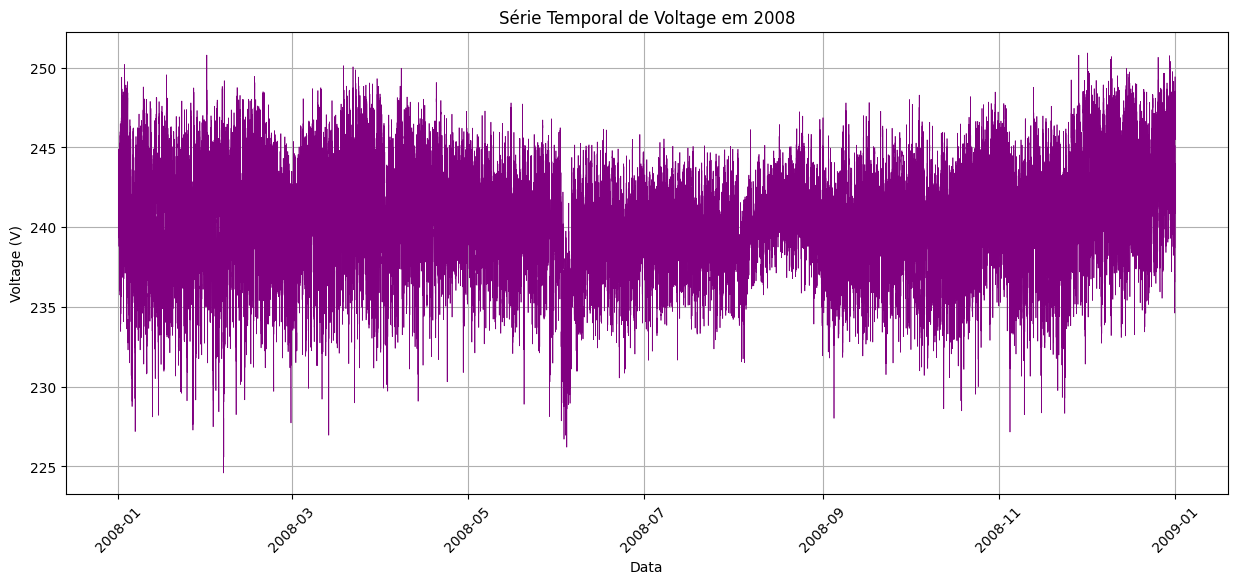

In [47]:
#Questão 14
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_2008 = df[df['Date'].dt.year == 2008].copy()
df_2008['Datetime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'])

plt.figure(figsize=(15,6))
plt.plot(df_2008['Datetime'], df_2008['Voltage'], color='purple', linewidth=0.5)
plt.title('Série Temporal de Voltage em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [48]:
#Questão 15
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Mes'] = df['Date'].dt.month

verao = df[df['Mes'].isin([6,7,8])]
inverno = df[df['Mes'].isin([12,1,2])]

media_verao = verao['Global_active_power'].mean()
media_inverno = inverno['Global_active_power'].mean()

print(f"Consumo médio no verão: {media_verao:.2f} kW")
print(f"Consumo médio no inverno: {media_inverno:.2f} kW")

Consumo médio no verão: 0.73 kW
Consumo médio no inverno: 1.42 kW


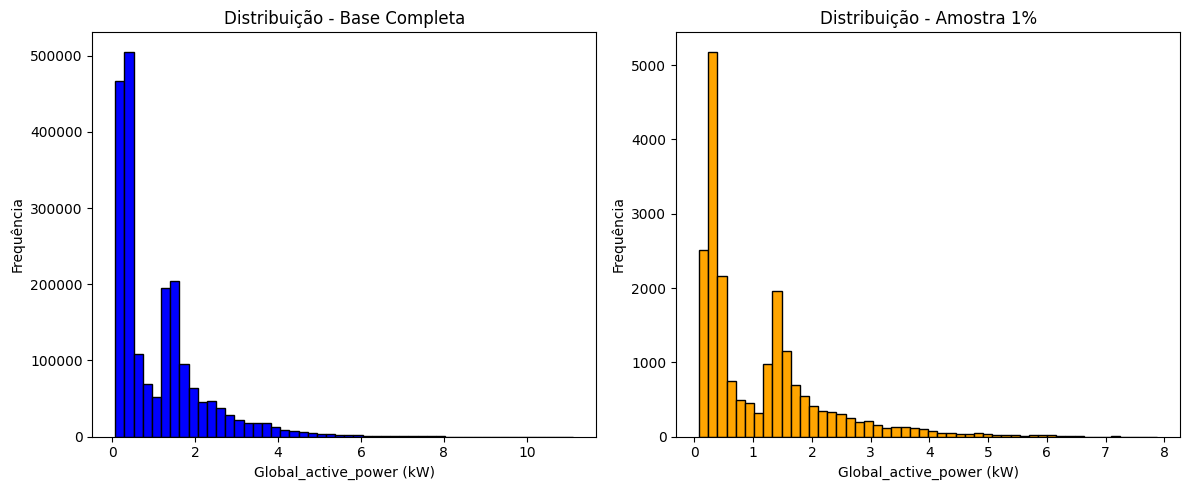

In [49]:
#Questão 16
import matplotlib.pyplot as plt

df_sample = df.sample(frac=0.01, random_state=42)  # random_state garante reprodutibilidade

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Global_active_power'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Distribuição - Base Completa')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.subplot(1,2,2)
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribuição - Amostra 1%')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [50]:
#Questão 17
from sklearn.preprocessing import MinMaxScaler

cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
        'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
        'Sub_metering_3', 'Total_Sub_metering']

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

df_scaled[cols].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328


Média de consumo por cluster:
Cluster
0    0.689159
1    1.208707
2    1.869834
Name: Global_active_power, dtype: float64


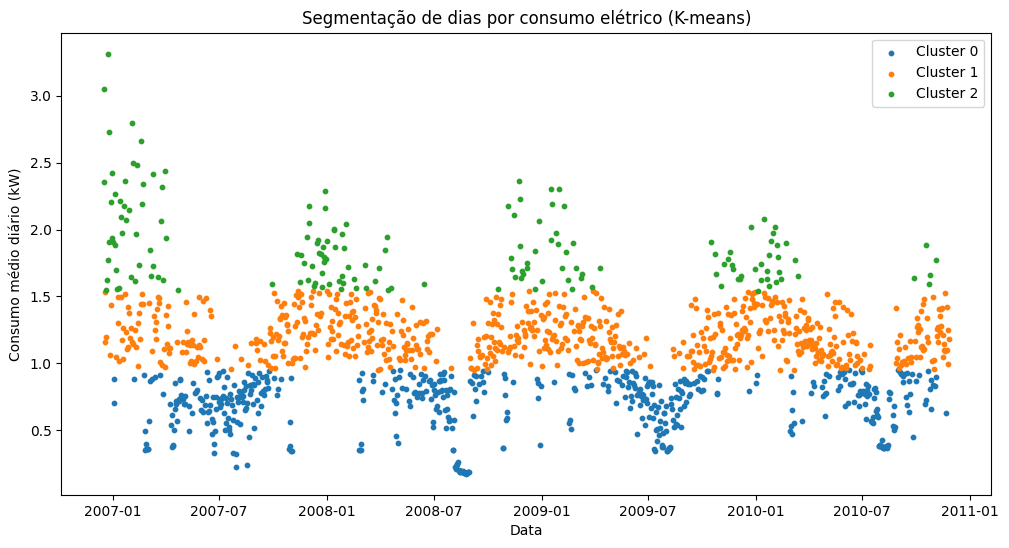

In [51]:
#Questão 18
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

consumo_diario = df.groupby('Date')['Global_active_power'].mean().reset_index()

consumo_diario = consumo_diario.dropna(subset=['Global_active_power'])

scaler = MinMaxScaler()
consumo_diario_scaled = scaler.fit_transform(consumo_diario[['Global_active_power']])

kmeans = KMeans(n_clusters=3, random_state=42)
consumo_diario['Cluster'] = kmeans.fit_predict(consumo_diario_scaled)

media_clusters = consumo_diario.groupby('Cluster')['Global_active_power'].mean()
print("Média de consumo por cluster:")
print(media_clusters)

plt.figure(figsize=(12,6))
for c in range(3):
    subset = consumo_diario[consumo_diario['Cluster'] == c]
    plt.scatter(subset['Date'], subset['Global_active_power'], label=f'Cluster {c}', s=10)
plt.xlabel('Data')
plt.ylabel('Consumo médio diário (kW)')
plt.title('Segmentação de dias por consumo elétrico (K-means)')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

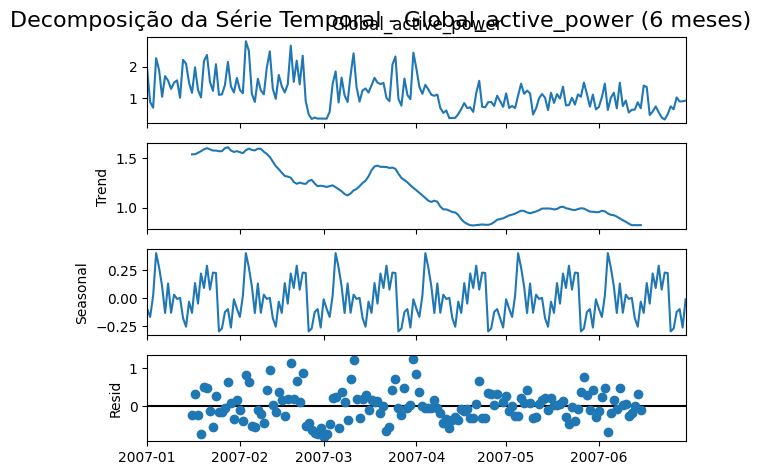

In [52]:
#Questão 19
from statsmodels.tsa.seasonal import seasonal_decompose

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df_6meses = df[(df['Date'] >= '2007-01-01') & (df['Date'] <= '2007-06-30')]

consumo_diario = df_6meses.groupby('Date')['Global_active_power'].mean()
consumo_diario = consumo_diario.dropna()

consumo_diario.index = pd.DatetimeIndex(consumo_diario.index)

decomposicao = seasonal_decompose(consumo_diario, model='additive', period=30)

plt.figure(figsize=(12,8))
decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal - Global_active_power (6 meses)', fontsize=16)
plt.show()

In [53]:
#Questão 20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_model = df[['Global_active_power', 'Global_intensity']].dropna()

X = df_model[['Global_intensity']]  # variável independente
y = df_model['Global_active_power']  # variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Coeficiente angular (slope): {modelo.coef_[0]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Coeficiente angular (slope): 0.2376
Intercepto: -0.0081
MAE: 0.0341
RMSE: 0.0496


**PARTE 2 – Exercícios adicionais no dataset inicial**

/tmp/ipython-input-3016923388.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hora = df['Global_active_power'].resample('H').mean()


Datetime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Freq: h, Name: Global_active_power, dtype: float64
Média de consumo por hora do dia:
Hora
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64


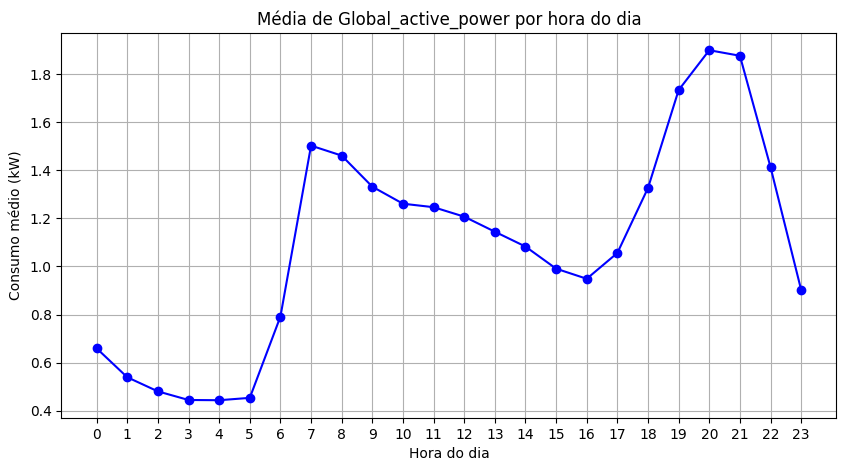

In [54]:
#Questão 21
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.set_index('Datetime')

df_hora = df['Global_active_power'].resample('H').mean()

print(df_hora.head())

df_hora_reset = df_hora.reset_index()
df_hora_reset['Hora'] = df_hora_reset['Datetime'].dt.hour

media_por_hora = df_hora_reset.groupby('Hora')['Global_active_power'].mean()

print("Média de consumo por hora do dia:")
print(media_por_hora)

plt.figure(figsize=(10,5))
plt.plot(media_por_hora.index, media_por_hora.values, marker='o', color='blue')
plt.title('Média de Global_active_power por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Consumo médio (kW)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

/tmp/ipython-input-4287969325.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_hora = df['Global_active_power'].resample('H').mean().dropna()


Autocorrelação em lag de 1h: 0.713
Autocorrelação em lag de 24h: 0.435
Autocorrelação em lag de 48h: 0.399


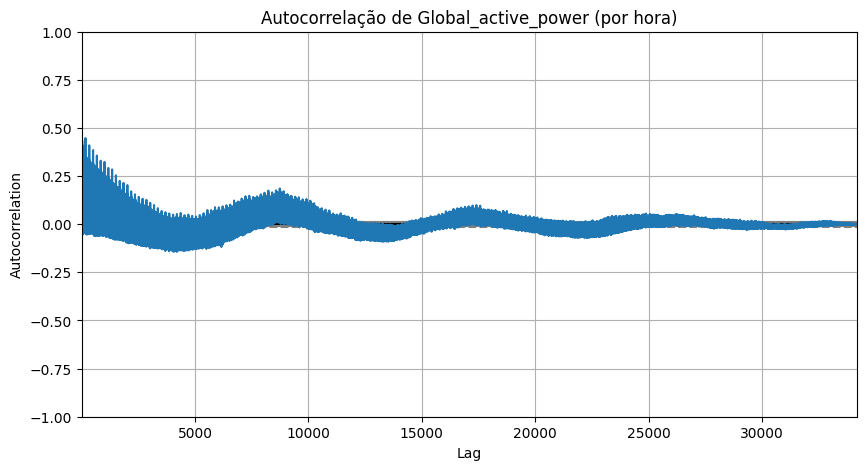

In [55]:
#Questão 22
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.set_index('Datetime')

serie_hora = df['Global_active_power'].resample('H').mean().dropna()

lag_1h = serie_hora.autocorr(lag=1)
lag_24h = serie_hora.autocorr(lag=24)
lag_48h = serie_hora.autocorr(lag=48)

print(f"Autocorrelação em lag de 1h: {lag_1h:.3f}")
print(f"Autocorrelação em lag de 24h: {lag_24h:.3f}")
print(f"Autocorrelação em lag de 48h: {lag_48h:.3f}")

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(serie_hora)
plt.title("Autocorrelação de Global_active_power (por hora)")
plt.show()

Variância explicada por PC1: 0.59
Variância explicada por PC2: 0.23
Variância total explicada: 0.82


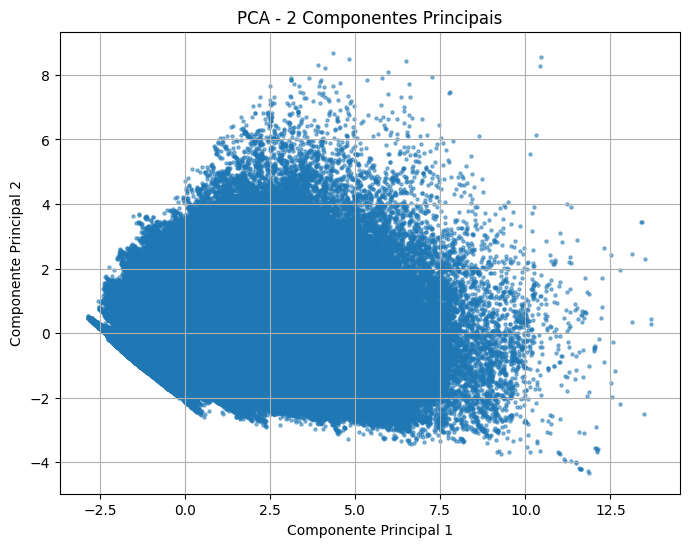

In [56]:
#Questão 23
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[cols].dropna()  # remover NaNs

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df_pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por PC1: {explained_variance[0]:.2f}")
print(f"Variância explicada por PC2: {explained_variance[1]:.2f}")
print(f"Variância total explicada: {explained_variance.sum():.2f}")


plt.figure(figsize=(8,6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], s=5, alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - 2 Componentes Principais')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


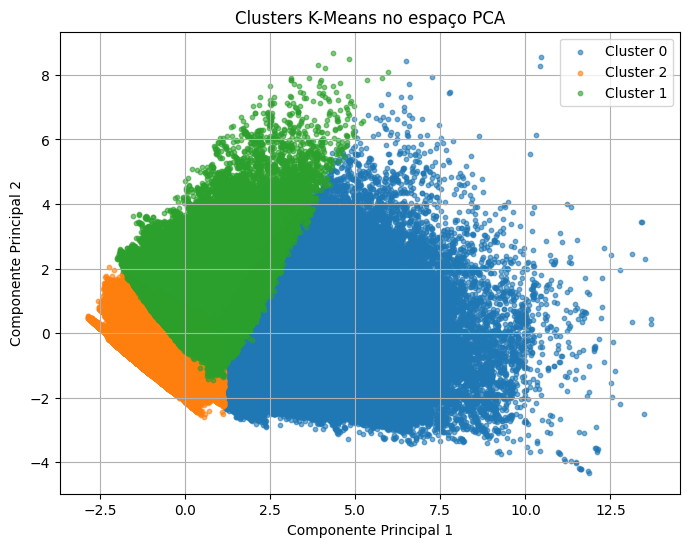

In [57]:
#Questão 24
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_cluster = df[cols].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8,6))
for cluster in df_pca['Cluster'].unique():
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', s=10, alpha=0.6)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-Means no espaço PCA')
plt.legend()
plt.grid(True)
plt.show()

RMSE Regressão Linear: 0.9719
RMSE Regressão Polinomial grau 2: 0.9674


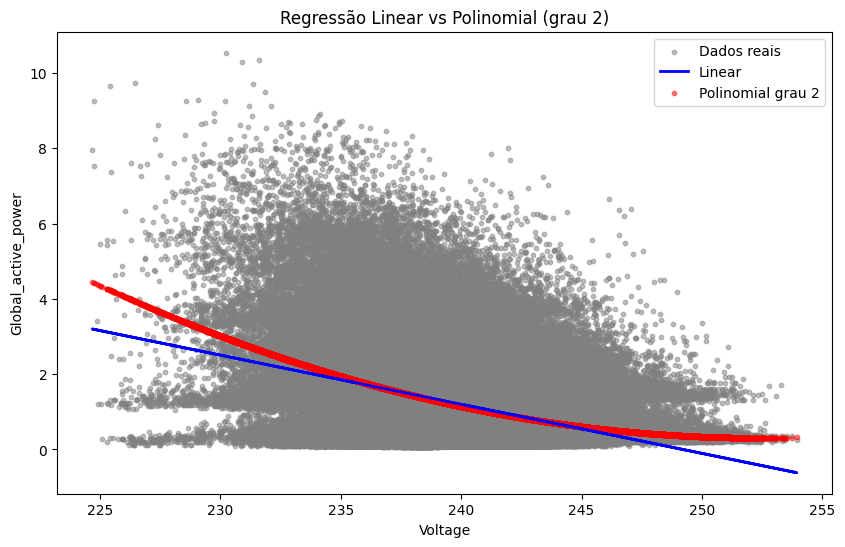

In [58]:
#Questão 25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df_model = df[['Global_active_power', 'Voltage']].dropna()

X = df_model[['Voltage']].values
y = df_model['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"RMSE Regressão Linear: {rmse_lin:.4f}")

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"RMSE Regressão Polinomial grau 2: {rmse_poly:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='gray', s=10, alpha=0.5, label='Dados reais')
plt.plot(X_test, y_pred_lin, color='blue', linewidth=2, label='Linear')
plt.scatter(X_test, y_pred_poly, color='red', s=10, alpha=0.5, label='Polinomial grau 2')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear vs Polinomial (grau 2)')
plt.legend()
plt.show()


In [59]:
#Questão 26
df = pd.read_csv("/content/cp1/energydata_complete.csv")

print("Primeiras linhas do dataset:")
print(df.head(), "\n")

print("Informações sobre o dataset:")
print(df.info(), "\n")

print("Estatísticas descritivas:")
print(df.describe())

Primeiras linhas do dataset:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   

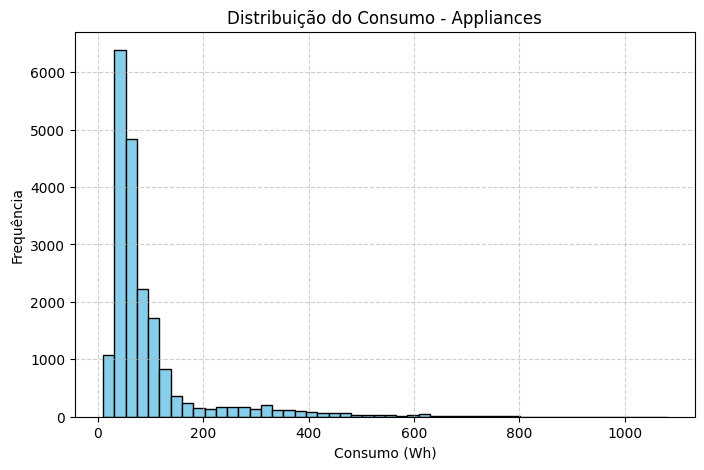

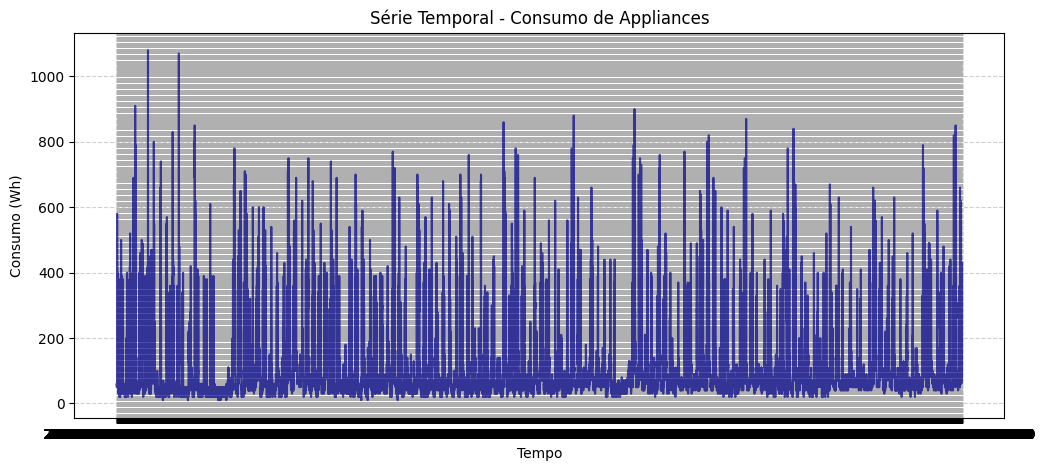

In [60]:
#Questão 27
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Appliances'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição do Consumo - Appliances")
plt.xlabel("Consumo (Wh)")
plt.ylabel("Frequência")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['Appliances'], color='darkblue', alpha=0.7)
plt.title("Série Temporal - Consumo de Appliances")
plt.xlabel("Tempo")
plt.ylabel("Consumo (Wh)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Altos**

Correlação de Appliances com variáveis ambientais:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Tdewpoint     0.015353
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


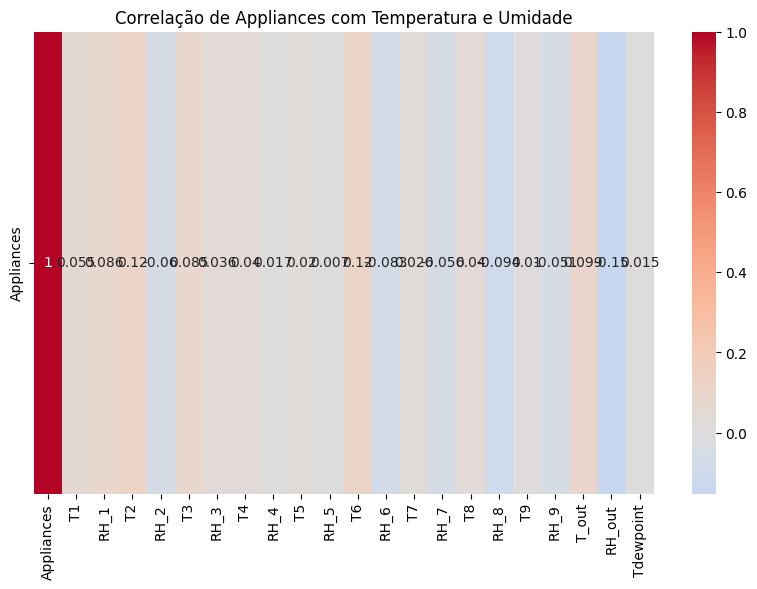

In [61]:
#Questão 28
variaveis_ambientais = [col for col in df.columns if col.startswith("T") or col.startswith("RH")]

correlacoes = df[["Appliances"] + variaveis_ambientais].corr()

correlacoes_appliances = correlacoes["Appliances"].sort_values(ascending=False)

print("Correlação de Appliances com variáveis ambientais:")
print(correlacoes_appliances)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlacoes[["Appliances"]].T, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação de Appliances com Temperatura e Umidade")
plt.show()


In [62]:
#Questão 29
from sklearn.preprocessing import MinMaxScaler

df_numerico = df.select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

print("Antes da normalização:")
print(df_numerico.describe().head())

print("\nDepois da normalização:")
print(df_normalizado.describe().head())

Antes da normalização:
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   

       ...            T9   

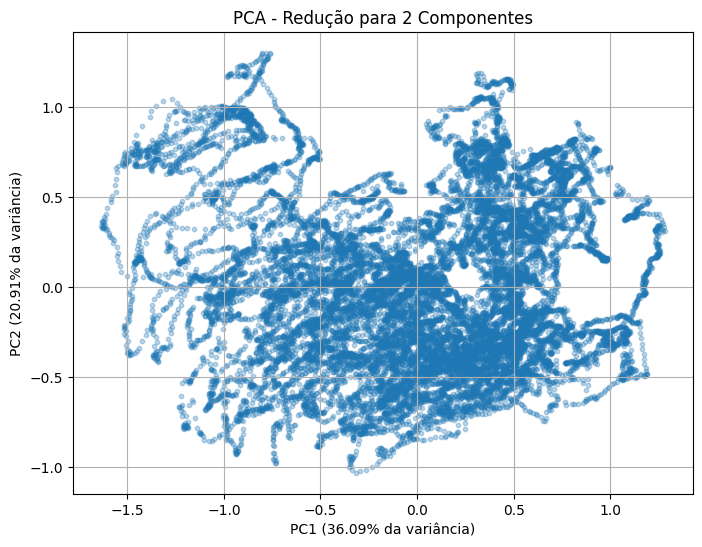

Variância explicada por componente:
[0.36089668 0.20905617]


In [63]:
#Questão 30
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = df_normalizado

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.3, s=10)
plt.title("PCA - Redução para 2 Componentes")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)")
plt.grid(True)
plt.show()

print("Variância explicada por componente:")
print(pca.explained_variance_ratio_)

In [64]:
#Questão 31
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X = df[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5',
        'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
        'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]

y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🔎 Avaliação do Modelo de Regressão Linear Múltipla:")
print(f"R²: {r2:.4f}")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")

🔎 Avaliação do Modelo de Regressão Linear Múltipla:
R²: 0.1492
MAE (Erro Absoluto Médio): 53.64
RMSE (Raiz do Erro Quadrático Médio): 93.62


In [65]:
#Questão 32
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Avaliação do Random Forest Regressor:")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

print("\nComparação com Regressão Linear:")
print(f"Linear - RMSE: {rmse:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")

Avaliação do Random Forest Regressor:
R²: 0.5744
MAE: 31.50
RMSE: 66.22

Comparação com Regressão Linear:
Linear - RMSE: 93.62
Random Forest - RMSE: 66.22


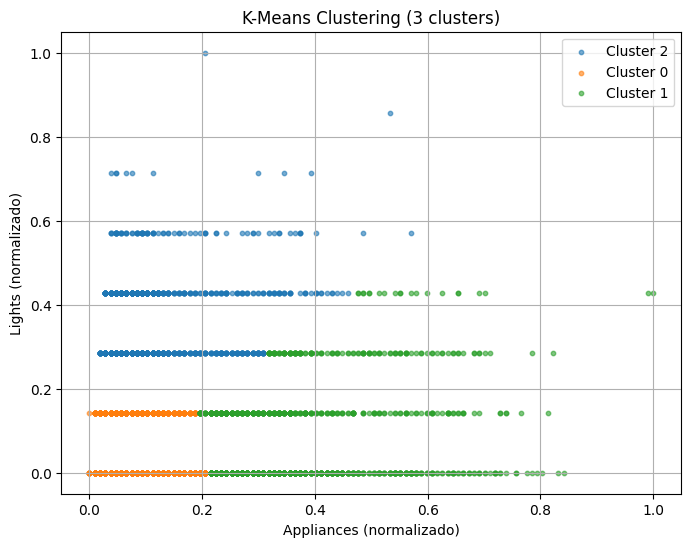

Média de consumo por cluster:
         Appliances    lights
Cluster                      
0          0.053890  0.016498
1          0.357116  0.064347
2          0.097439  0.334887


In [66]:
#Questão 33
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster = df_normalizado[['Appliances', 'lights']]  # exemplo: consumo total e luzes

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster = X_cluster.copy()
df_cluster['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8,6))
for c in df_cluster['Cluster'].unique():
    subset = df_cluster[df_cluster['Cluster'] == c]
    plt.scatter(subset['Appliances'], subset['lights'], s=10, alpha=0.6, label=f'Cluster {c}')

plt.xlabel("Appliances (normalizado)")
plt.ylabel("Lights (normalizado)")
plt.title("K-Means Clustering (3 clusters)")
plt.legend()
plt.grid(True)
plt.show()

cluster_means = df_cluster.groupby('Cluster').mean()
print("Média de consumo por cluster:")
print(cluster_means)

Logistic Regression
Accuracy: 0.7552778246917751
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3197
           1       0.74      0.72      0.73      2724

    accuracy                           0.76      5921
   macro avg       0.75      0.75      0.75      5921
weighted avg       0.75      0.76      0.75      5921

Random Forest Classifier
Accuracy: 0.8978213139672353
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3197
           1       0.90      0.88      0.89      2724

    accuracy                           0.90      5921
   macro avg       0.90      0.90      0.90      5921
weighted avg       0.90      0.90      0.90      5921



/tmp/ipython-input-4655588.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


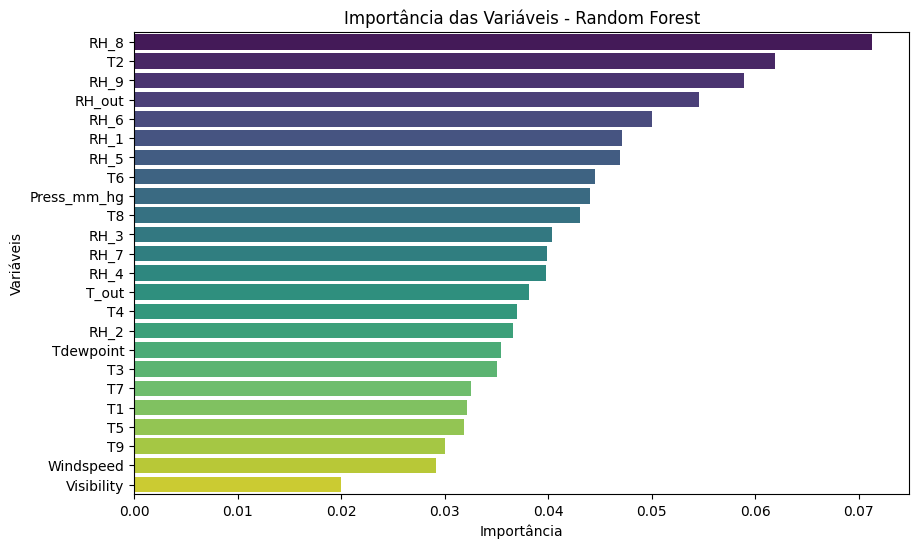

In [67]:
#Questão 34
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

mediana = df['Appliances'].median()
df['Alto_Consumo'] = (df['Appliances'] > mediana).astype(int)

X = df[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5',
        'T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
        'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
y = df['Alto_Consumo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=5000, solver='saga')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

importances = rf_clf.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()


📊 Logistic Regression


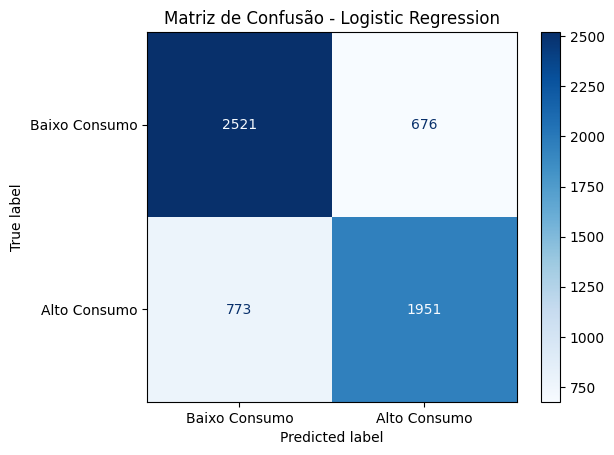

               precision    recall  f1-score   support

Baixo Consumo       0.77      0.79      0.78      3197
 Alto Consumo       0.74      0.72      0.73      2724

     accuracy                           0.76      5921
    macro avg       0.75      0.75      0.75      5921
 weighted avg       0.75      0.76      0.75      5921

Random Forest Classifier


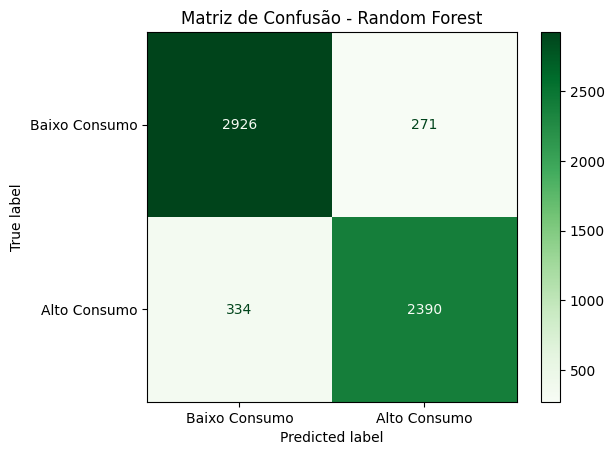

               precision    recall  f1-score   support

Baixo Consumo       0.90      0.92      0.91      3197
 Alto Consumo       0.90      0.88      0.89      2724

     accuracy                           0.90      5921
    macro avg       0.90      0.90      0.90      5921
 weighted avg       0.90      0.90      0.90      5921



In [68]:
#Questão 35
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

print("📊 Logistic Regression")

cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Baixo Consumo", "Alto Consumo"])
disp_log.plot(cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

print(classification_report(y_test, y_pred_log, target_names=["Baixo Consumo", "Alto Consumo"]))

print("Random Forest Classifier")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Baixo Consumo", "Alto Consumo"])
disp_rf.plot(cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=["Baixo Consumo", "Alto Consumo"]))